# Holmboe Wave Instability Analysis

Note for now, you'll need to install the development version of Dedalus for this to work. You'll also need to pull from the tip of [my fork](https://github.com/jsoishi/dedalus) to use this analysis notebook.

I've made much use here of [xarray](https://docs.xarray.dev/en/stable/), which makes visualization of cartesian Dedalus data very, very easy. We are thinking of adapting this as our main visualization strategy for `d3`, so please let me know what you think!

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import xarray as xr
import hvplot.xarray
import re

In [2]:
def load_d3(filename, fields=None):
    df = h5py.File(filename,'r')
    tasks = []
    da = []
    names = []
    if fields is None:
        fields = df['tasks'].keys()
    for f in fields:
        data = df['tasks'][f]
        names.append(data.name.split('/')[-1])
        dims = []
        scales = []
        for d in data.dims:
            dims.append(d.label)
            scales.append(d[0][:]) # hack...shouldn't just take first scale
        da.append(xr.DataArray(data[:], coords=dict(zip(dims, scales)),dims=dims))
    df.close()
    return xr.Dataset(dict(zip(names,da)))
        

In [17]:
snap = load_d3("runs/run_2/snapshots/snapshots_s5.h5")

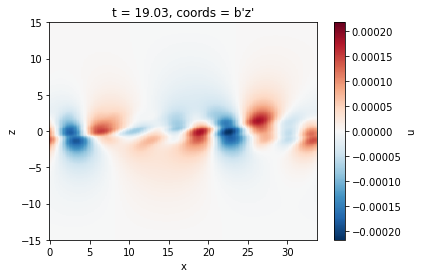

In [12]:
a = snap['u'].isel(t=-1).sel(coords=b'z').plot(x="x")

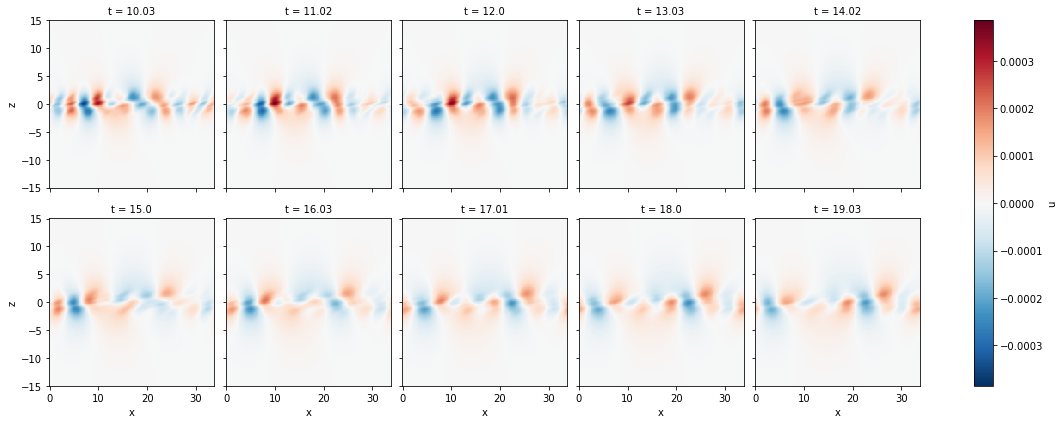

In [13]:
a = snap['u'].sel(coords=b'z').plot(x="x",col="t",col_wrap=5)

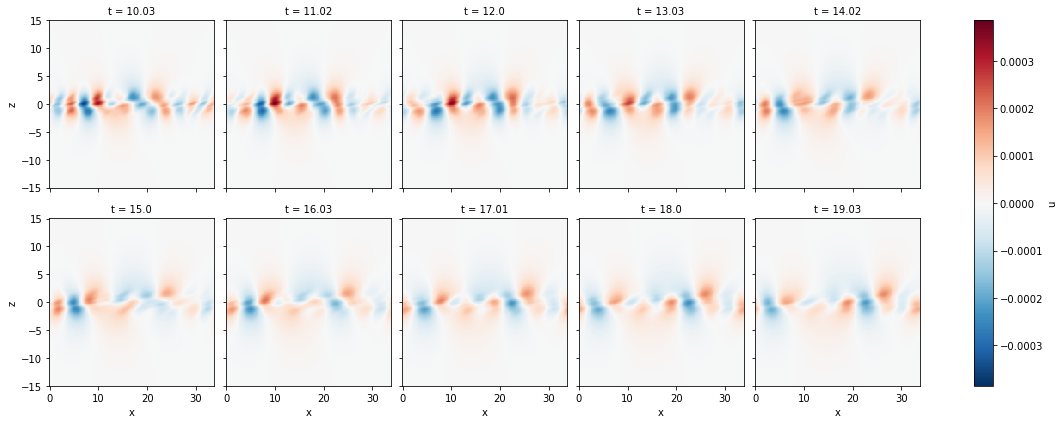

In [14]:
a = snap['u'].sel(coords=b'z').plot(x="x",col="t",col_wrap=5)

In [18]:
Aspect = 2.82842712475
rho_1 = snap['rho'] - (1 - np.tanh(snap['z']*Aspect))

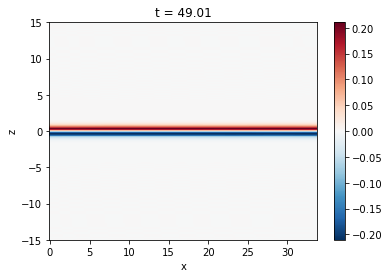

In [19]:
rho_1.isel(t=-1).plot(x="x")

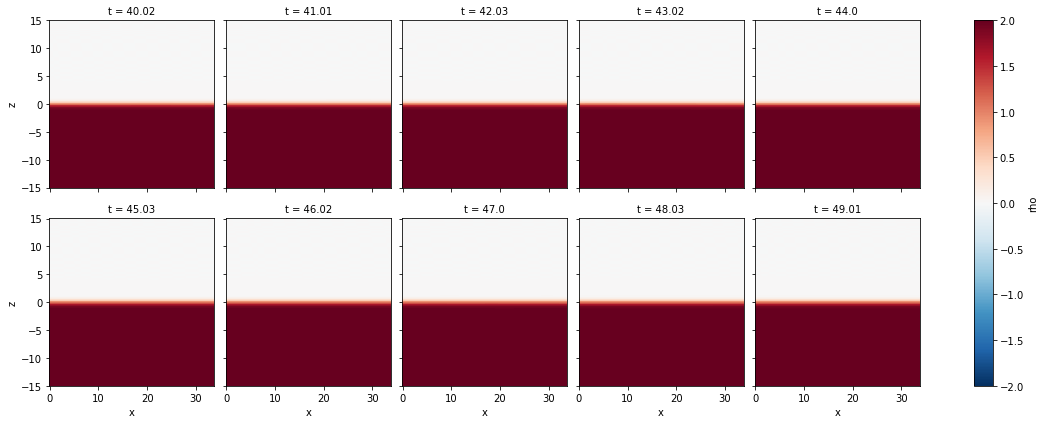

In [20]:
a = snap['rho'].plot(x="x",col="t",col_wrap=5)
#a.set(clim=(0,2))
#a.figure.savefig('density_t239.png', dpi=300)

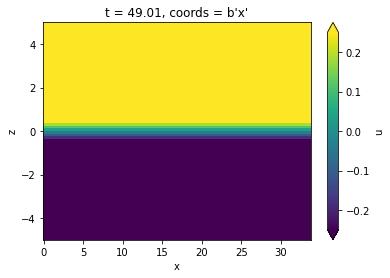

In [21]:
snap['u'].isel(t=-1).sel(coords=b'x').plot(x="x",ylim=(-5,5),vmin=-0.25,vmax=0.25)

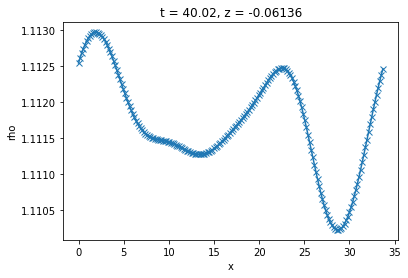

In [22]:
snap['rho'].isel(t=0).sel(z=0,method='nearest').plot(x="x",marker='x')

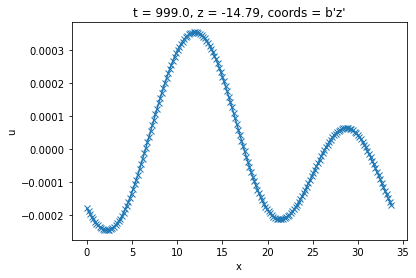

In [158]:
snap['u'].isel(t=-1,coords=1,z=20).plot(x="x",marker='x')

In [159]:
snap.u.sel(coords=b'z').hvplot.quadmesh('x','z',
    groupby="t",  # adds a widget for time
    widget_type="scrubber",
    widget_location="bottom",
)

Column
    [0] HoloViews(DynamicMap, widget_location='bottom', widget_type='scrubber')
    [1] Row
        [0] HSpacer()
        [1] WidgetBox
            [0] Player(end=9, width=550)
        [2] HSpacer()

In [160]:
snap.u.sel(coords=b'z').isel(x=0).hvplot('z',
    groupby="t",  # adds a widget for time
    widget_type="scrubber",
    widget_location="bottom",
)

Column
    [0] HoloViews(DynamicMap, widget_location='bottom', widget_type='scrubber')
    [1] Row
        [0] HSpacer()
        [1] WidgetBox
            [0] Player(end=9, width=550)
        [2] HSpacer()

In [63]:
snap.u.sel(coords=b'x').isel(z=0).hvplot('x',
    groupby="t",  # adds a widget for time
    widget_type="scrubber",
    widget_location="bottom",
)

Column
    [0] HoloViews(DynamicMap, widget_location='bottom', widget_type='scrubber')
    [1] Row
        [0] HSpacer()
        [1] WidgetBox
            [0] Player(end=9, width=550)
        [2] HSpacer()

In [75]:
snap.rho.isel(x=96).hvplot('z',
    groupby="t",  # adds a widget for time
    widget_type="scrubber",
    widget_location="bottom",
)

Column
    [0] HoloViews(DynamicMap, widget_location='bottom', widget_type='scrubber')
    [1] Row
        [0] HSpacer()
        [1] WidgetBox
            [0] Player(end=9, width=550)
        [2] HSpacer()

## Timeseries analysis

The script doesn't contain any timeseries (i.e. volume averaged data) output, but that is easy to add. Here, if you save the console output of Dedalus (as is done by every scheduler), you can use regular expressions to get the growth rate as a function of time by plotting max(w) vs time. My outputfile was called `slurm-20088.out`; just replace that below with whatever yours is called.

In [31]:
with open("slurm-20088.out","r") as log:
    raw_data = log.readlines()

In [32]:
t_log = []
w_max_log = []
for l in raw_data:
    m = re.search("Time=([\d.e+-]*).*max\(w\)=([\d.]*)",l)
    if m:
        t_log.append(float(m.group(1)))
        w_max_log.append(float(m.group(2)))

Text(0, 0.5, 'max(w)')

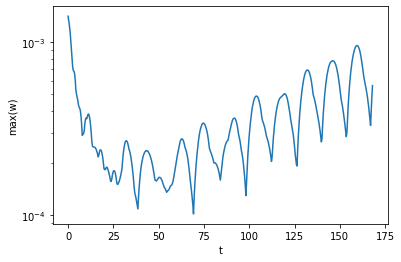

In [33]:
plt.semilogy(t_log,w_max_log)
plt.xlabel("t")
plt.ylabel("max(w)")